### Импорт библиотек и загрузка данных




In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Загрузка данных
prsa_data = pd.read_csv("/Users/olegsuhov/Downloads/PRSA_Data-2.csv")
prsa_data.head()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


### Идентификация ошибочных значений




In [6]:
# Замена значений -1 на NaN, так как концентрация газа не может быть отрицательной
prsa_data.replace(-1, np.nan, inplace=True)
prsa_data.head()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


### Визуализация распределения атрибутов




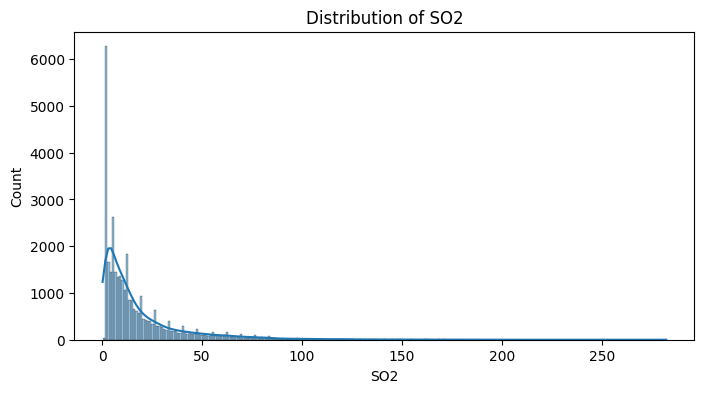

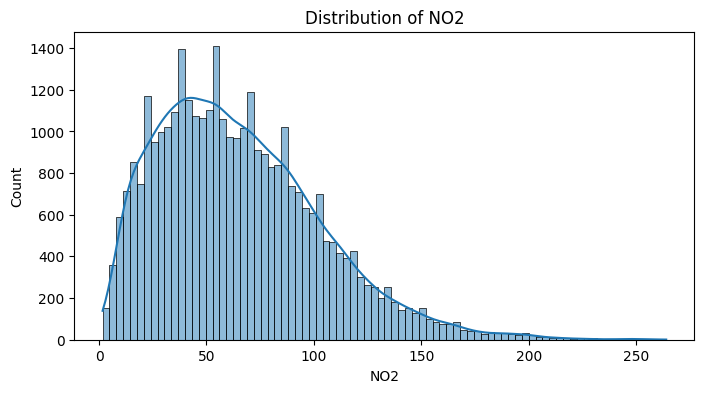

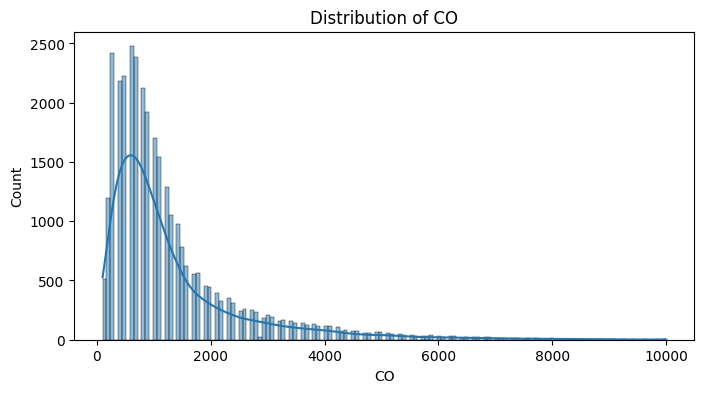

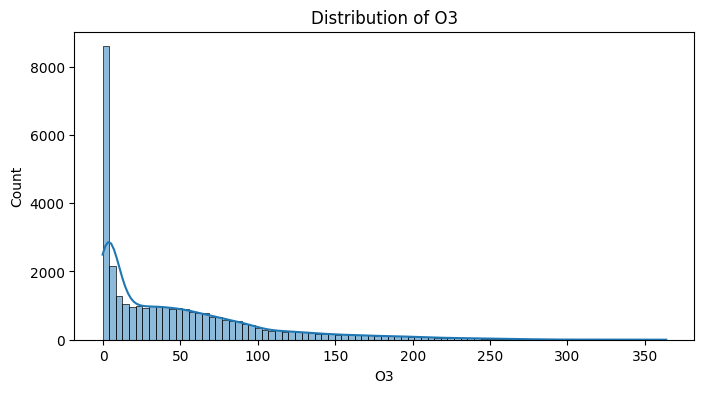

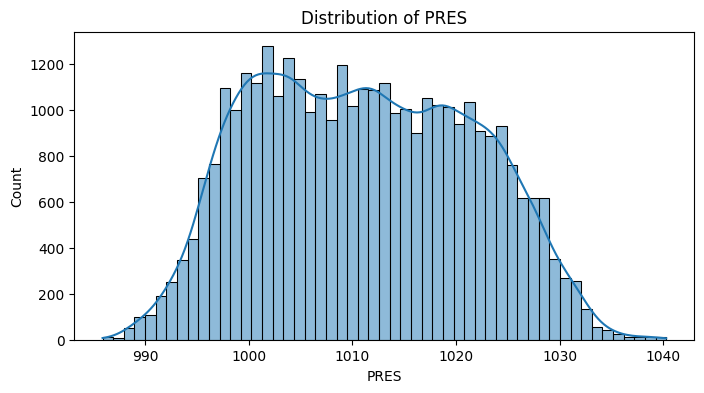

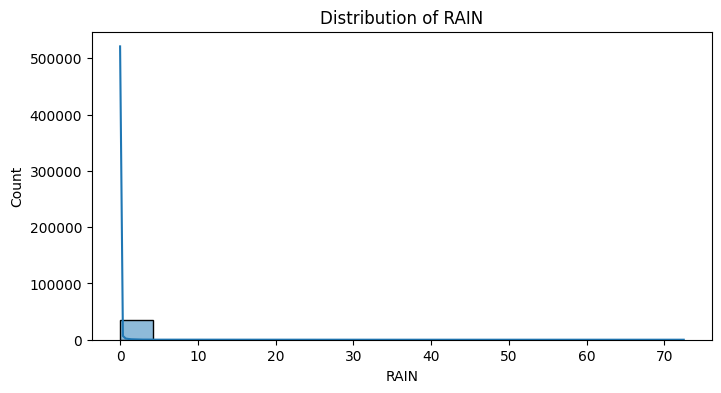

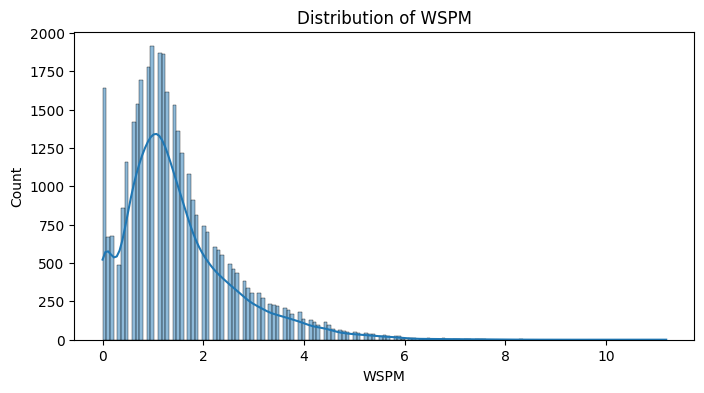

In [7]:
# Гистограммы для числовых атрибутов
numeric_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(prsa_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Бинаризация атрибутов




In [8]:
# Бинаризация атрибута RAIN
prsa_data['IS_RAIN'] = (prsa_data['RAIN'] > 0).astype(int)
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35064.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040954
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198186
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


### Визуализация связи атрибутов с целевой переменной







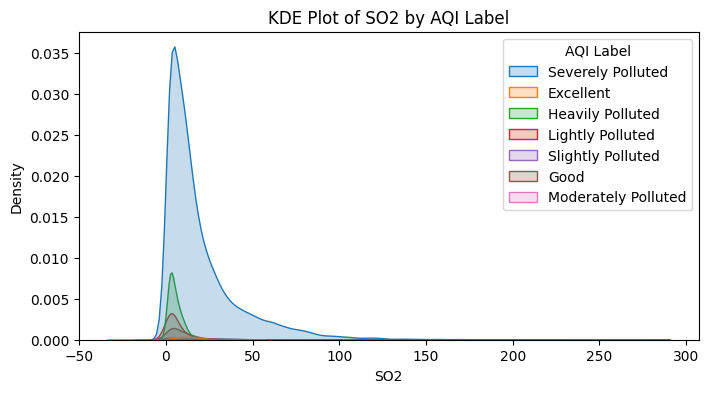

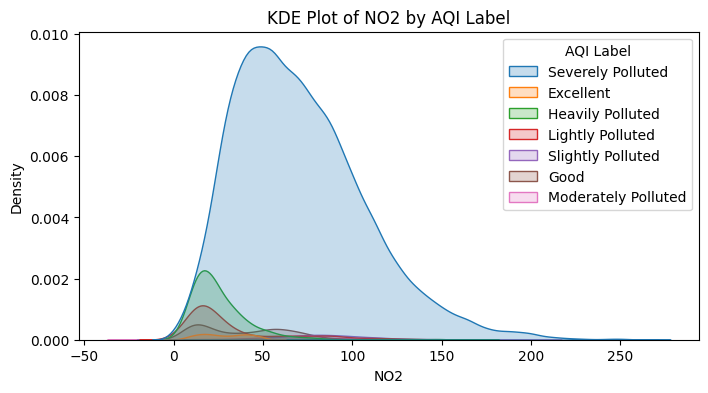

/var/folders/2_/25s5kxc155g0f29f0gvfwn380000gn/T/ipykernel_24724/2564652872.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x=column, hue='AQI Label', fill=True)


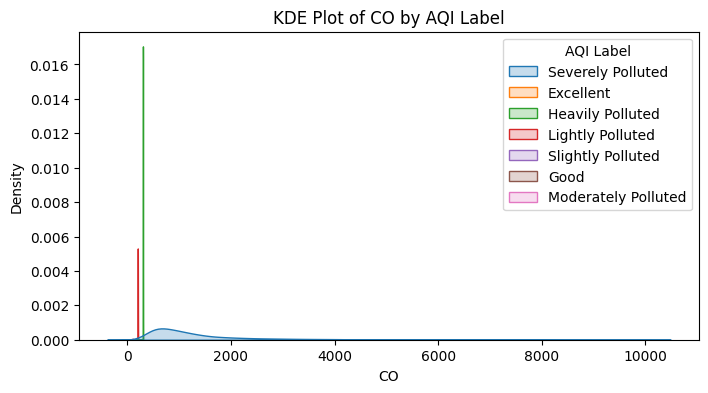

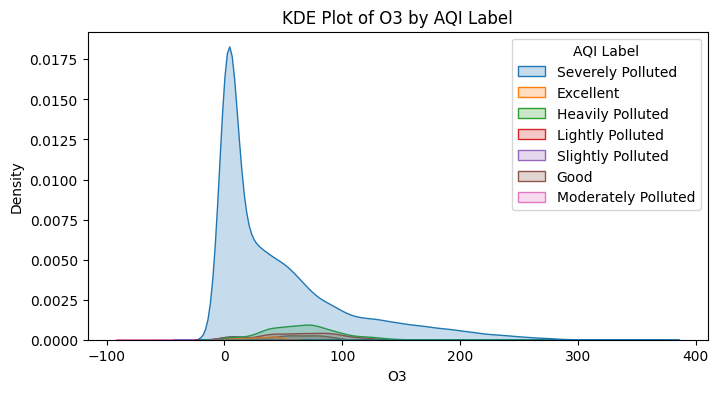

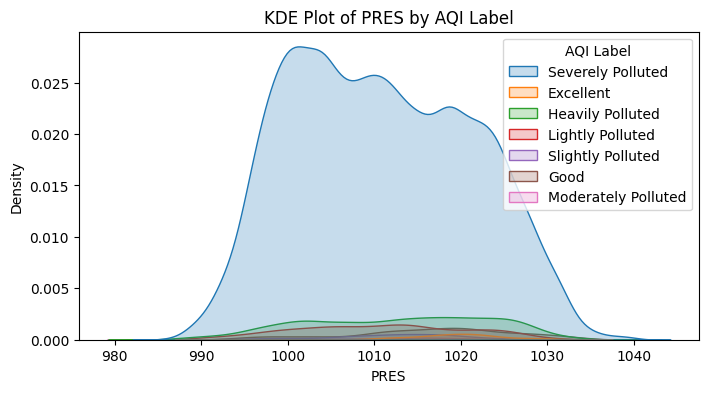

ValueError: Could not interpret value `RAIN` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [11]:
# Визуализация связи числовых атрибутов с целевой переменной
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=prsa_data, x=column, hue='AQI Label', fill=True)
    plt.title(f'KDE Plot of {column} by AQI Label')
    plt.show()


### Группировка численных значений




In [12]:
# Группировка значений CO
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(prsa_data['CO'], bins=bin_ranges, labels=bin_names)
prsa_data.head()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0,2


### Удаление экстремальных значений




In [13]:
# Клиппинг экстремальных значений
columns_to_clip = ['SO2', 'NO2', 'O3', 'WSPM']

for col in columns_to_clip:
    lower, upper = prsa_data[col].quantile([0.01, 0.99])
    prsa_data[col] = prsa_data[col].clip(lower, upper)


In [19]:
# Заполнение пропусков средним значением
prsa_data.dropna(inplace = True)


### Округление атрибутов







In [20]:
# Округление значений O3
prsa_data['O3'] = np.round(prsa_data['O3']).astype(int)
prsa_data.head()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0,3
1,1,2,6.0,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0,3
5,5,6,8.0,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0,2
6,6,7,10.0,21.0,300.0,52,1026.5,NNE,2.5,Heavily Polluted,0,2
7,7,8,11.0,26.0,300.0,47,1027.4,NNW,3.8,Heavily Polluted,0,2


### Нормализация численных признаков




In [21]:
# Нормализация численных признаков
scaler = StandardScaler()
normalized_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

for col in normalized_columns:
    prsa_data[f'{col}_new'] = scaler.fit_transform(prsa_data[[col]])

prsa_data.head()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label,SO2_new,NO2_new,CO_new,O3_new,PRES_new,WSPM_new
0,0,1,6.0,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0,3,-0.560822,-0.976585,-0.721685,0.052406,1.176078,2.732549
1,1,2,6.0,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0,3,-0.560822,-0.976585,-0.721685,0.015784,1.195281,3.014605
5,5,6,8.0,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0,2,-0.462856,-1.273086,-0.802422,0.089028,1.425714,2.074419
6,6,7,10.0,21.0,300.0,52,1026.5,NNE,2.5,Heavily Polluted,0,2,-0.364891,-1.165267,-0.802422,0.052406,1.512126,0.946196
7,7,8,11.0,26.0,300.0,47,1027.4,NNW,3.8,Heavily Polluted,0,2,-0.315908,-1.030494,-0.802422,-0.039150,1.598538,2.168438


### Построение кореллограммы




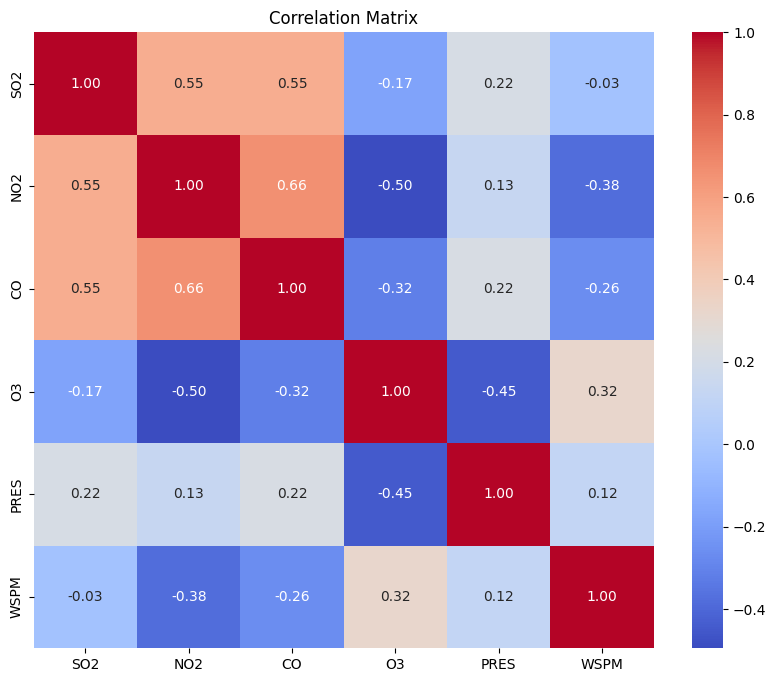

In [22]:
# Построение кореллограммы
plt.figure(figsize=(10, 8))
sns.heatmap(prsa_data[normalized_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Визуализация связей между признаками




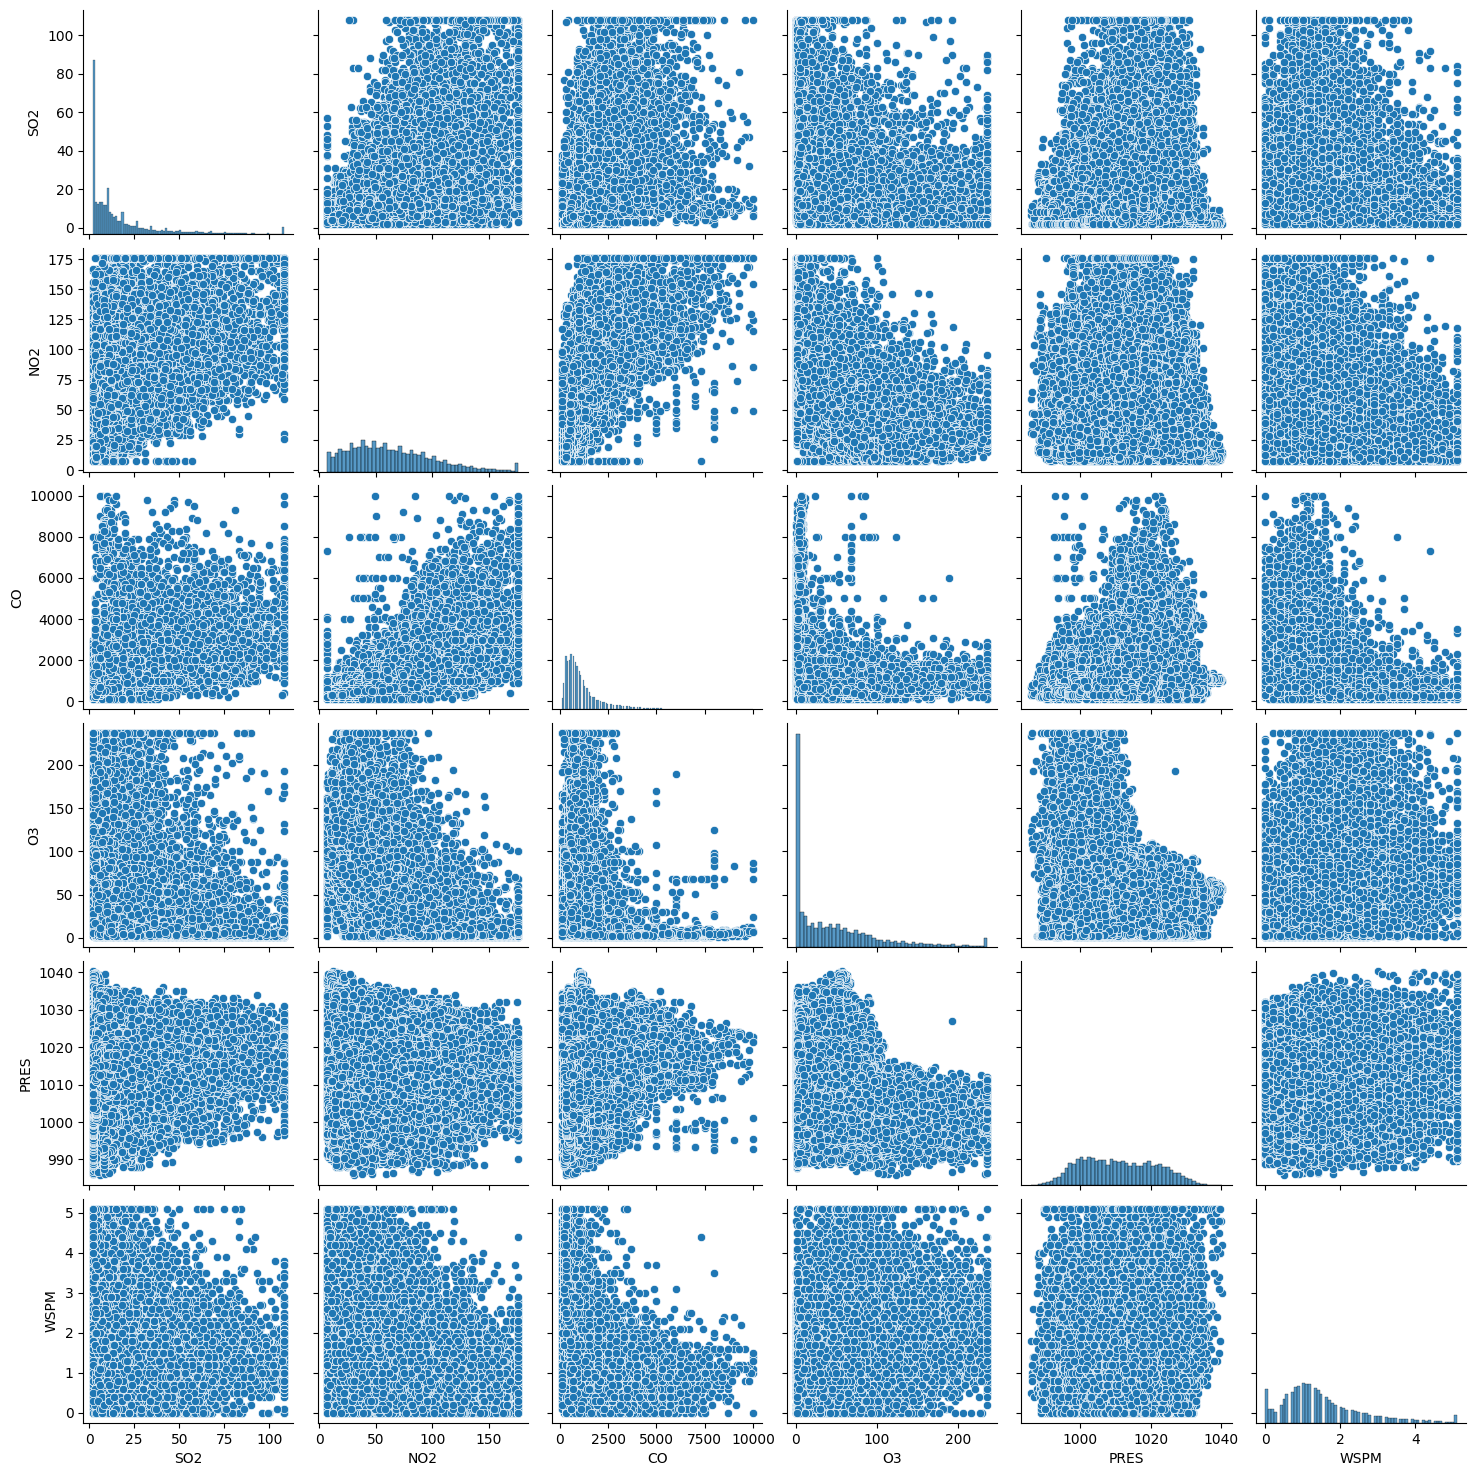

In [23]:
# Визуализация связей между признаками
sns.pairplot(prsa_data[normalized_columns])
plt.show()
